# Configuration and initial Import

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys

project_path = '../'
sys.path.append(project_path)

# Imports

In [2]:
from os import path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

sns.set_context("notebook")
sns.set_style("darkgrid")

from exploration.fall_study_stats import TherapeuticStats, PharmaStats, MoleculeStats

from exploration.events_flowchart import build_events_flowchart

In [3]:
molecule_mapping = pd.read_csv("/home/sebiat/stats/2018_03_13/mapping_molecules.csv")

In [4]:
sns.set_palette("muted")
event_type = "achats"
colors_dict = {
    "Antihypertenseurs": sns.color_palette()[0], # Blue
    "Antidepresseurs": sns.color_palette()[1], # Vert
    "Hypnotiques": sns.color_palette()[2], # Rouge
    "Neuroleptiques": sns.color_palette()[3] # Violet
}

# Parameters

In [5]:
flowchart_json = '''
{
    "intermediate_cohorts": {
        "outcome": ["hospitalized_fractures", "liberal_fractures",
             "public_ambulatory_fractures", "private_ambulatory_fractures"]
    },
    "steps": [
        "extract_patients",
        "exposures",
        "filter_patients",
        "outcome"
    ]
}
'''

In [6]:
root_path = "/home/sebiat/stats/CNAM-311"

# Therapeutic level

In [7]:
therapeutic_level_exposures = spark.read.parquet("/user/sebiat/therapeutic/drug_purchases/data")

In [8]:
metadata_json = '''
{
  "class_name" : "fr.polytechnique.cmap.cnam.study.fall.FallMain$",
  "start_timestamp" : "2018-02-09T13:52:23Z",
  "end_timestamp" : "2018-02-09T14:04:58Z",
  "operations" : [ {
    "name" : "extract_patients",
    "inputs" : [ "source" ],
    "output_type" : "patients",
    "output_path" : "/user/sebiat/molecules/extract_patients/data"
  }, {
    "name" : "drug_purchases",
    "inputs" : [ "source" ],
    "output_type" : "dispensations",
    "output_path" : "q",
    "population_path" : "/user/sebiat/molecules/drug_purchases/patients"
  }, {
    "name" : "acts",
    "inputs" : [ "source" ],
    "output_type" : "acts",
    "output_path" : "/user/sebiat/molecules/acts/data",
    "population_path" : "/user/sebiat/molecules/acts/patients"
  }, {
    "name" : "diagnoses",
    "inputs" : [ "source" ],
    "output_type" : "diagnosis",
    "output_path" : "/user/sebiat/molecules/diagnoses/data",
    "population_path" : "/user/sebiat/molecules/diagnoses/patients"
  }, {
    "name" : "filter_patients",
    "inputs" : [ "drug_purchases", "extract_patients" ],
    "output_type" : "patients",
    "output_path" : "/user/sebiat/molecules/filter_patients/data"
  }, {
    "name" : "exposures",
    "inputs" : [ "drug_purchases" ],
    "output_type" : "exposures",
    "output_path" : "/user/sebiat/molecules/exposures/data",
    "population_path" : "/user/sebiat/molecules/exposures/patients"
  }, {
    "name" : "liberal_acts",
    "inputs" : [ "acts" ],
    "output_type" : "acts",
    "output_path" : "/user/sebiat/molecules/liberal_acts/data",
    "population_path" : "/user/sebiat/molecules/liberal_acts/patients"
  }, {
    "name" : "liberal_fractures",
    "inputs" : [ "liberal_acts" ],
    "output_type" : "outcomes",
    "output_path" : "/user/sebiat/molecules/fractures/liberal_fractures/data",
    "population_path" : "/user/sebiat/molecules/fractures/liberal_fractures/patients"
  }, {
    "name" : "hospitalized_fractures",
    "inputs" : [ "diagnoses", "acts" ],
    "output_type" : "outcomes",
    "output_path" : "/user/sebiat/molecules/fractures/hospitalized_fractures/data",
    "population_path" : "/user/sebiat/molecules/fractures/hospitalized_fractures/patients"
  }, {
    "name" : "public_ambulatory_fractures",
    "inputs" : [ "acts" ],
    "output_type" : "outcomes",
    "output_path" : "/user/sebiat/molecules/fractures/public_ambulatory_fractures/data",
    "population_path" : "/user/sebiat/molecules/fractures/public_ambulatory_fractures/patients"
  }, {
    "name" : "private_ambulatory_fractures",
    "inputs" : [ "acts" ],
    "output_type" : "outcomes",
    "output_path" : "/user/sebiat/molecules/fractures/private_ambulatory_fractures/data",
    "population_path" : "/user/sebiat/molecules/fractures/private_ambulatory_fractures/patients"
  } ]
}
'''

In [9]:
events = build_events_flowchart(therapeutic_level_exposures, flowchart_json, metadata_json)

Constructing cohort for operation 'public_ambulatory_fractures'
Reading patients
Finished Reading
Constructing cohort for operation 'acts'
Reading patients
Finished Reading
Constructing cohort for operation 'liberal_fractures'
Reading patients
Finished Reading
Constructing cohort for operation 'extract_patients'
Reading patients
Finished Reading
Constructing cohort for operation 'hospitalized_fractures'
Reading patients
Finished Reading
Constructing cohort for operation 'exposures'
Reading patients
Finished Reading
Constructing cohort for operation 'filter_patients'
Reading patients
Finished Reading
Constructing cohort for operation 'diagnoses'
Reading patients
Finished Reading
Constructing cohort for operation 'drug_purchases'
Reading patients
Finished Reading
Constructing cohort for operation 'private_ambulatory_fractures'
Reading patients
Finished Reading
Constructing cohort for operation 'liberal_acts'
Reading patients
Finished Reading


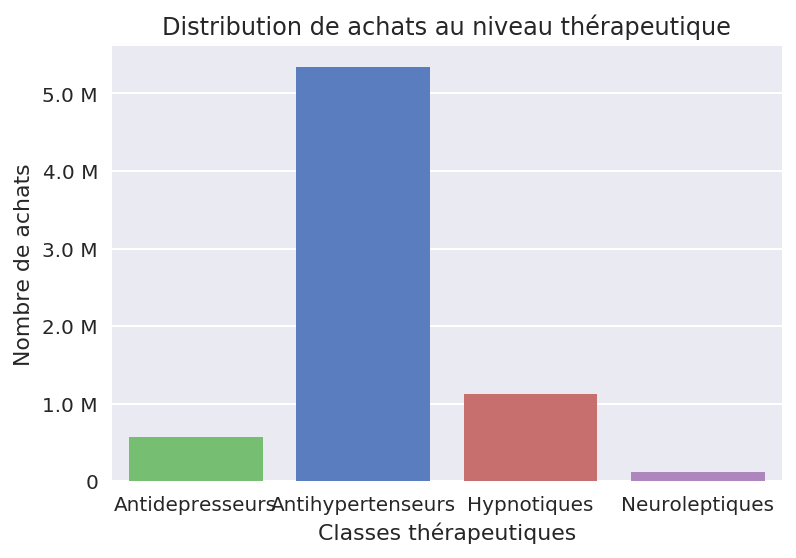

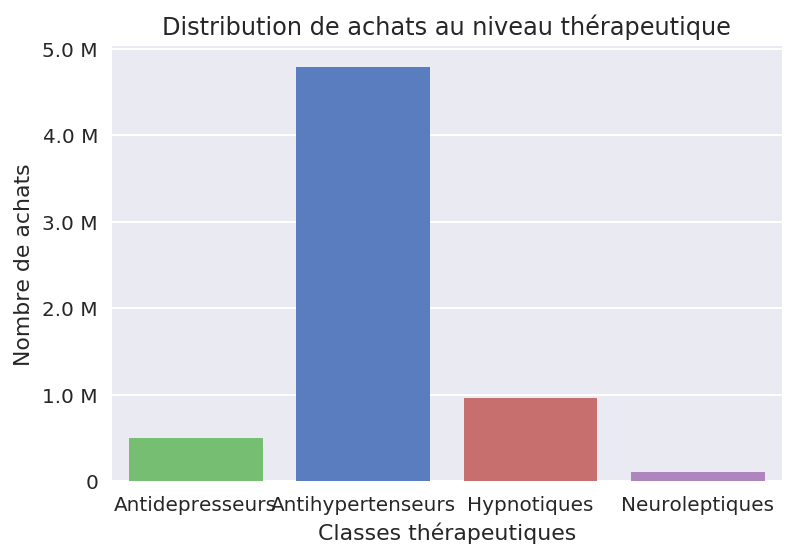

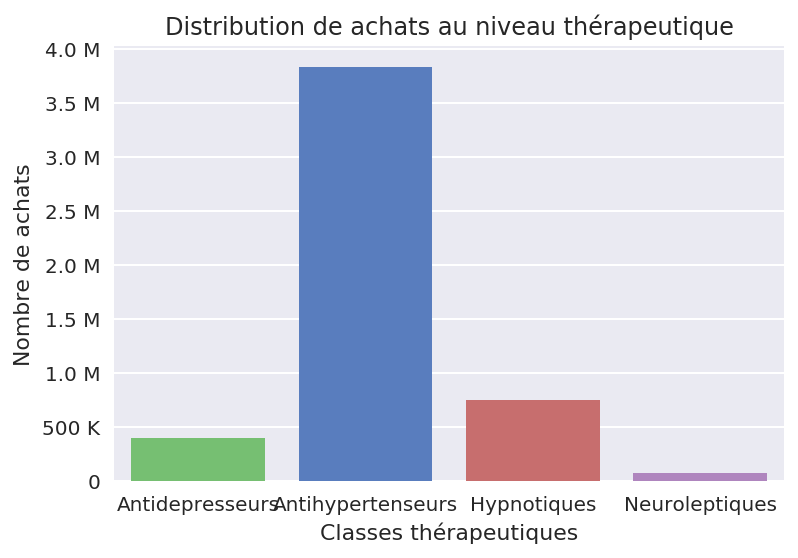

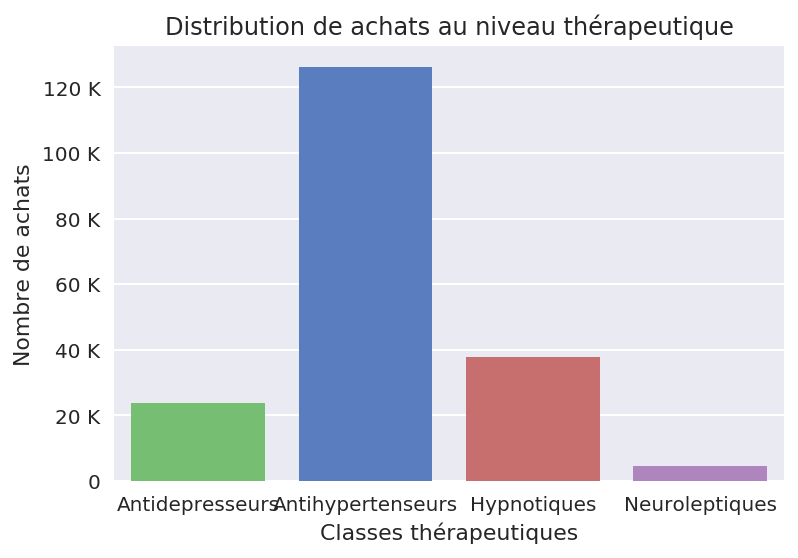

In [10]:
filepath = path.join(root_path, "{}_niveau_therapeutique.pdf".format(event_type))

with PdfPages(filepath) as pdf:
    for therapeutic_level_exposures in events:
        therapeutic_stats = TherapeuticStats(therapeutic_level_exposures, colors_dict, event_type)
        fig = plt.figure()
        therapeutic_stats.plot()
        pdf.savefig(fig)


# Pharmaceutic level

In [11]:
pharmaceutique_level_exposures = spark.read.parquet("/user/sebiat/pharmaceutic/drug_purchases/data")

events = build_events_flowchart(pharmaceutique_level_exposures, flowchart_json, metadata_json)

Constructing cohort for operation 'public_ambulatory_fractures'
Reading patients
Finished Reading
Constructing cohort for operation 'acts'
Reading patients
Finished Reading
Constructing cohort for operation 'liberal_fractures'
Reading patients
Finished Reading
Constructing cohort for operation 'extract_patients'
Reading patients
Finished Reading
Constructing cohort for operation 'hospitalized_fractures'
Reading patients
Finished Reading
Constructing cohort for operation 'exposures'
Reading patients
Finished Reading
Constructing cohort for operation 'filter_patients'
Reading patients
Finished Reading
Constructing cohort for operation 'diagnoses'
Reading patients
Finished Reading
Constructing cohort for operation 'drug_purchases'
Reading patients
Finished Reading
Constructing cohort for operation 'private_ambulatory_fractures'
Reading patients
Finished Reading
Constructing cohort for operation 'liberal_acts'
Reading patients
Finished Reading


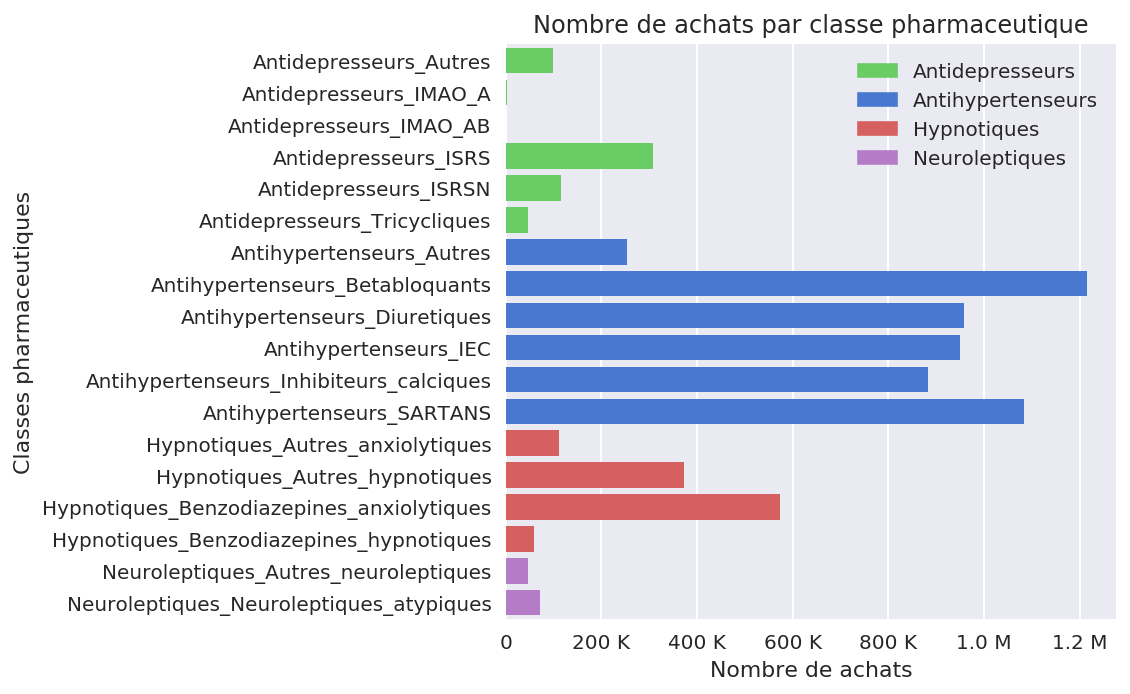

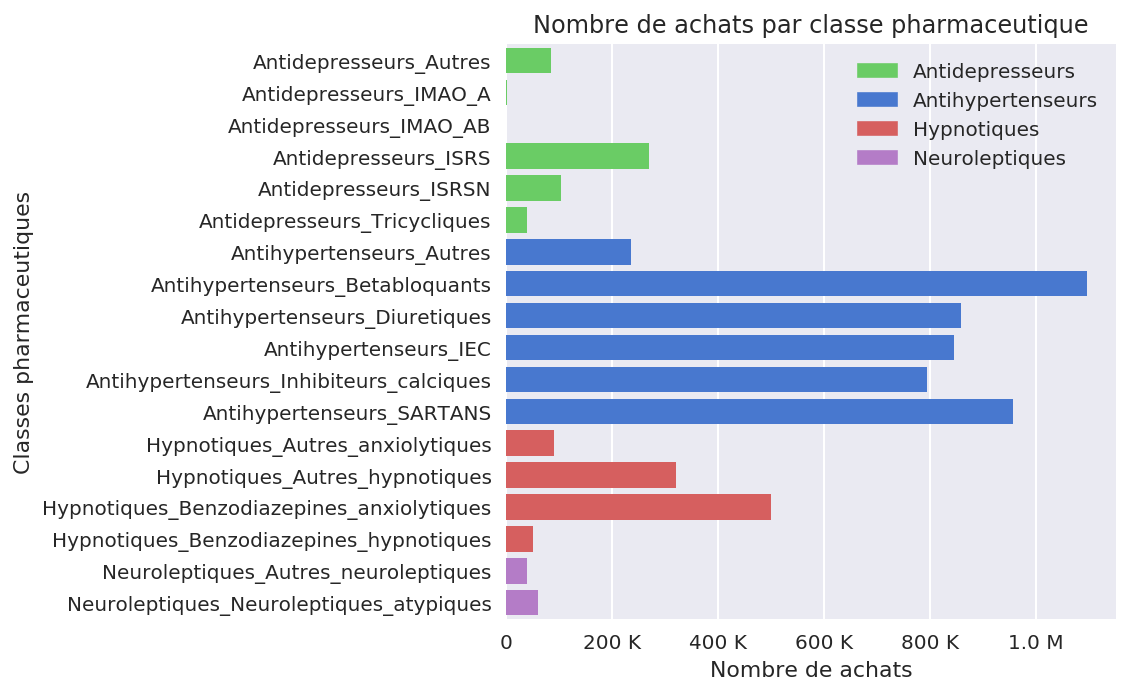

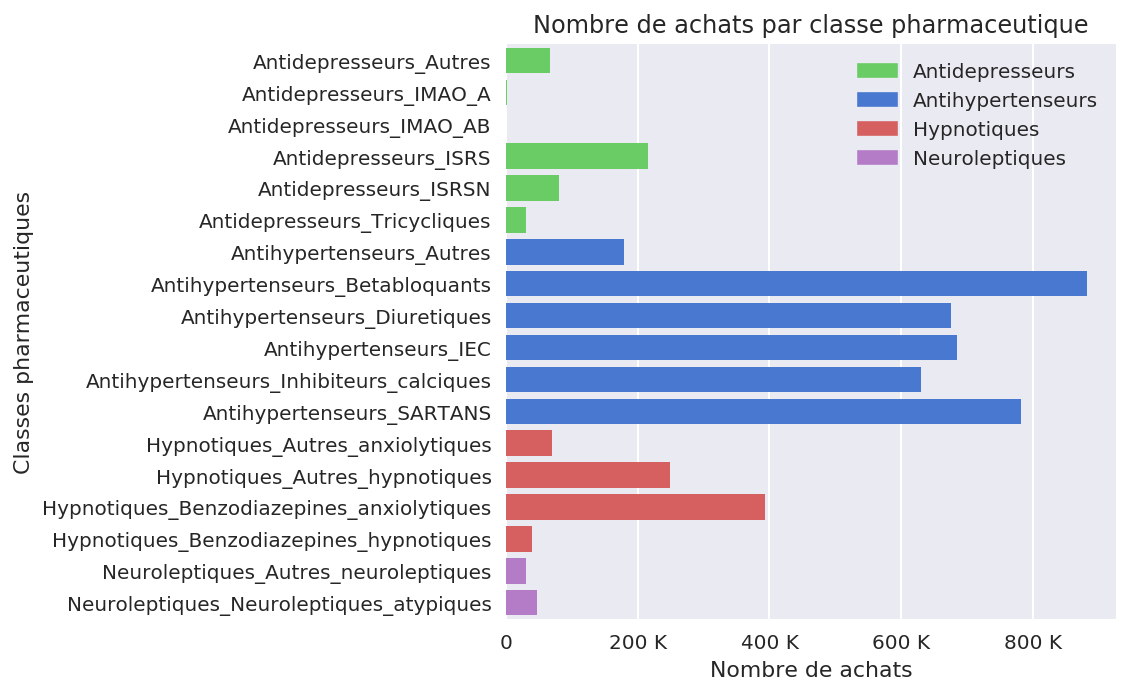

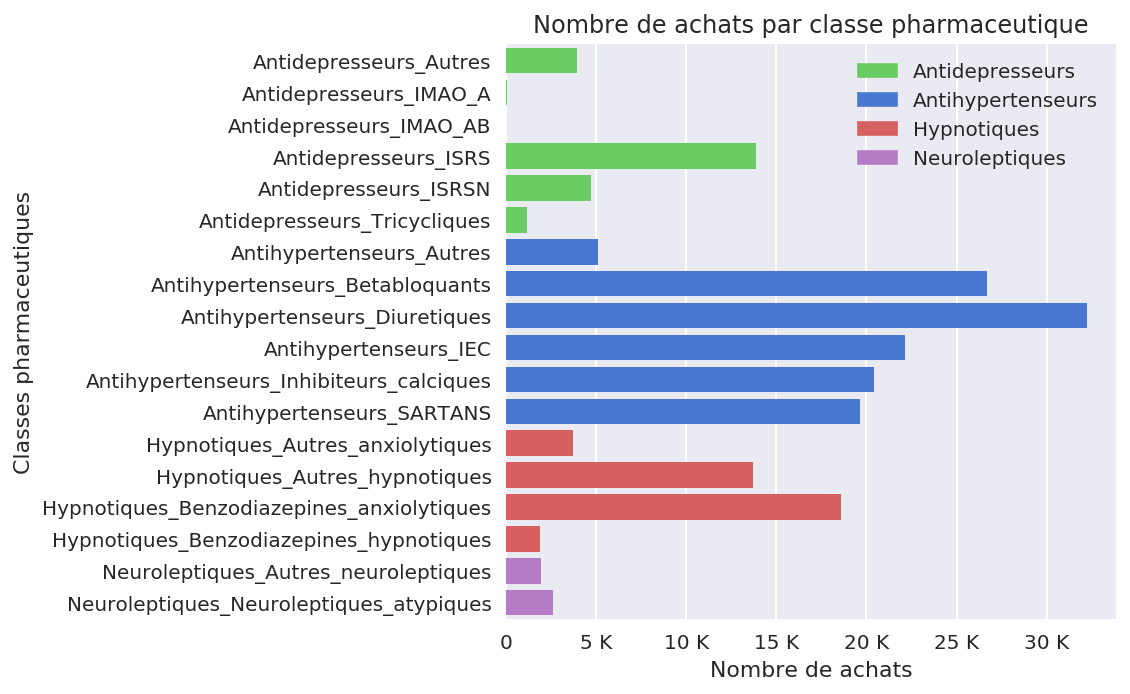

In [12]:
filepath = path.join(root_path, "{}_niveau_pharmaceutique.pdf".format(event_type))

with PdfPages(filepath) as pdf:
    for pharmaceutique_level_exposures in events:
        pharma_stats = PharmaStats(molecule_mapping[["pharmaceutic_family", "therapeutic"]].drop_duplicates(),
                           pharmaceutique_level_exposures, event_type, colors_dict)
        fig = plt.figure(figsize=(8, 5))
        pharma_stats.plot()
        plt.tight_layout()
        pdf.savefig(fig)

# Molecule level

In [13]:
molecule_level_exposures = spark.read.parquet("/user/sebiat/molecules/drug_purchases/data")

events = build_events_flowchart(molecule_level_exposures, flowchart_json, metadata_json)

Constructing cohort for operation 'public_ambulatory_fractures'
Reading patients
Finished Reading
Constructing cohort for operation 'acts'
Reading patients
Finished Reading
Constructing cohort for operation 'liberal_fractures'
Reading patients
Finished Reading
Constructing cohort for operation 'extract_patients'
Reading patients
Finished Reading
Constructing cohort for operation 'hospitalized_fractures'
Reading patients
Finished Reading
Constructing cohort for operation 'exposures'
Reading patients
Finished Reading
Constructing cohort for operation 'filter_patients'
Reading patients
Finished Reading
Constructing cohort for operation 'diagnoses'
Reading patients
Finished Reading
Constructing cohort for operation 'drug_purchases'
Reading patients
Finished Reading
Constructing cohort for operation 'private_ambulatory_fractures'
Reading patients
Finished Reading
Constructing cohort for operation 'liberal_acts'
Reading patients
Finished Reading


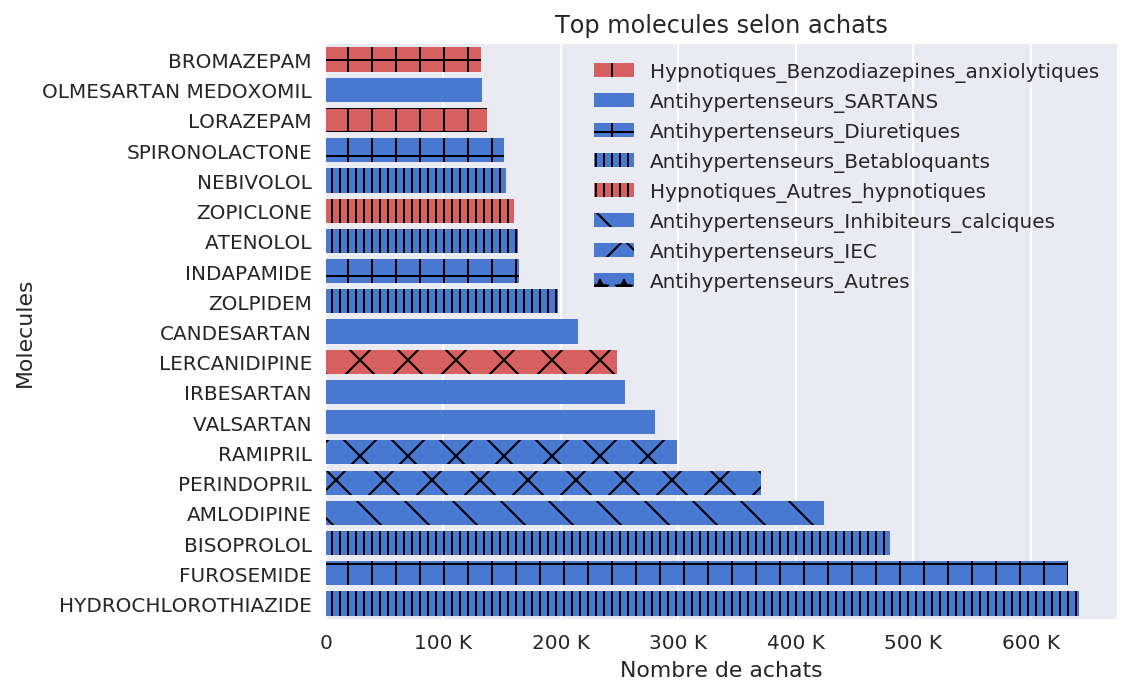

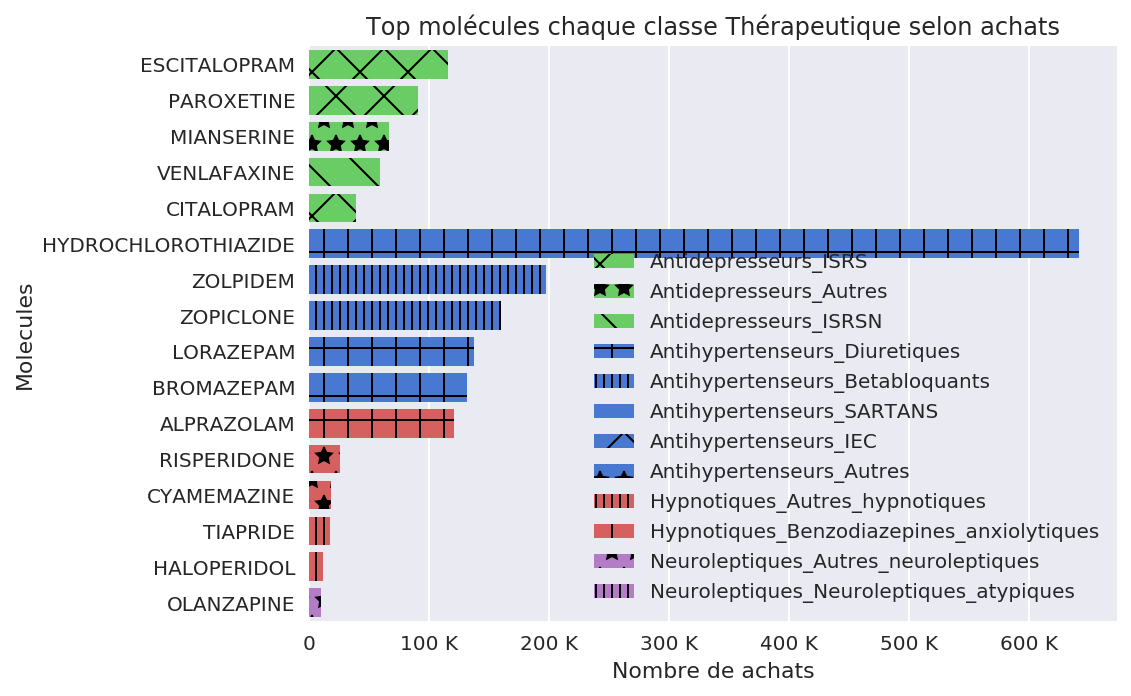

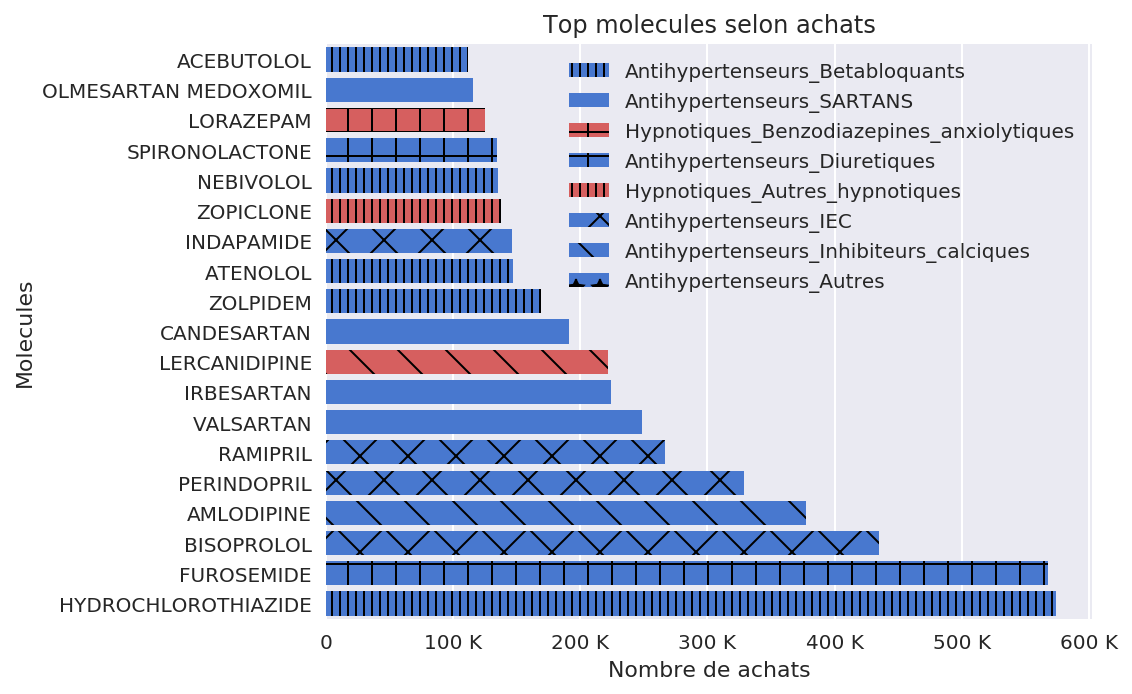

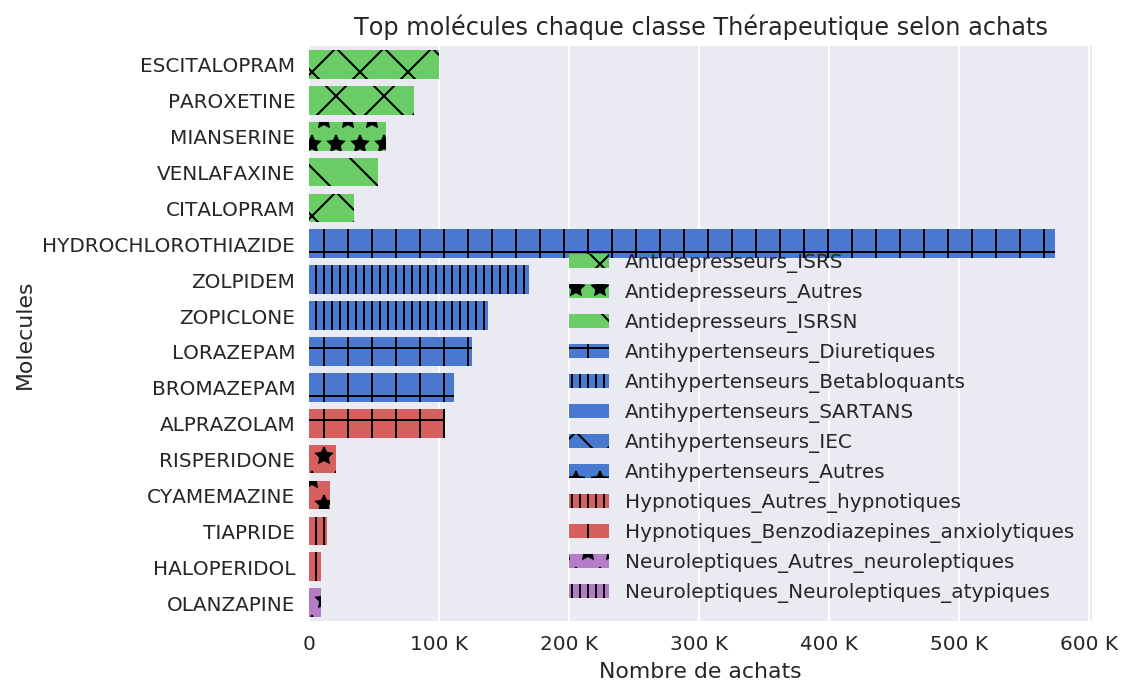

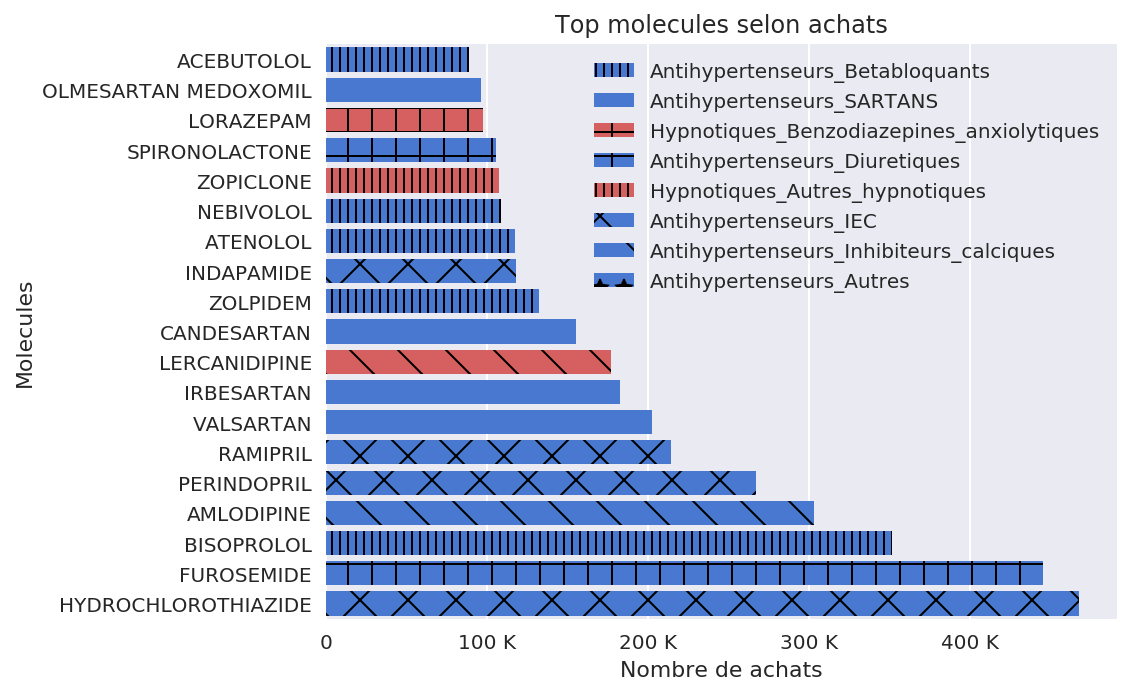

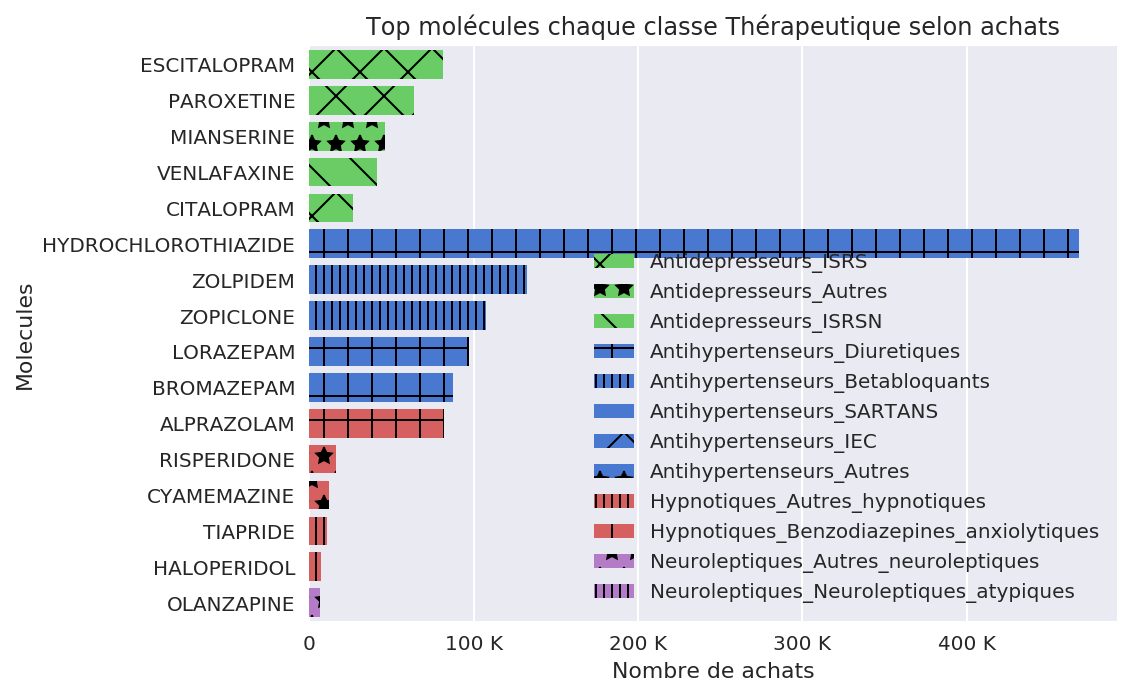

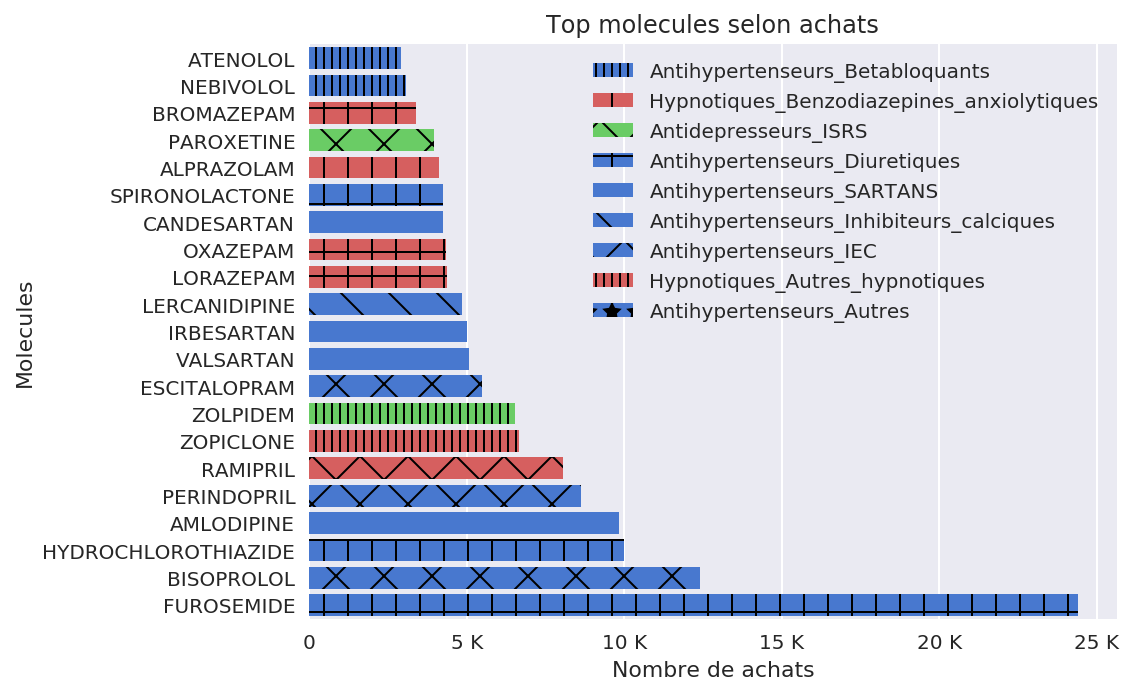

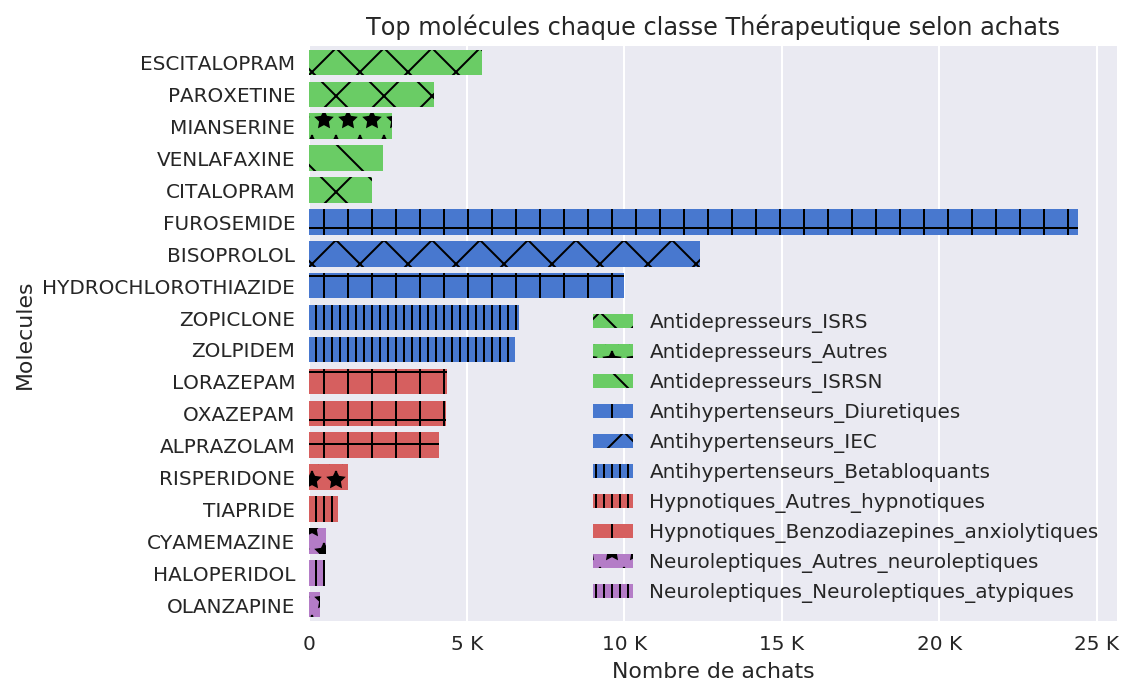

In [14]:
filepath = path.join(root_path, "{}_niveau_moleculaire.pdf".format(event_type))

with PdfPages(filepath) as pdf:
    for molecule_level_exposures in events:
        molecule_stats = MoleculeStats(molecule_mapping[["pharmaceutic_family", "therapeutic", "molecule"]].drop_duplicates(),
                               molecule_level_exposures, colors_dict, event_type)
        fig = plt.figure(figsize=(8, 5))
        ax = molecule_stats.plot_overall_top_molecules(top=30)
        plt.tight_layout()
        pdf.savefig(fig)
        
        fig = plt.figure(figsize=(8, 5))
        ax = molecule_stats.plot_top_of_therapeutic_classes()
        plt.tight_layout()
        pdf.savefig(fig)